# Basic Image Classification Model

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

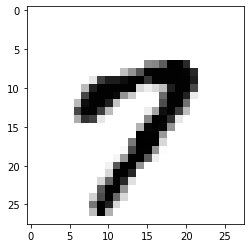

In [15]:
plt.imshow(x_train[15], cmap= "binary")
plt.show()

In [16]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
y_train[0]

5

In [22]:
y_train_enc[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_train_enc[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

In [20]:
y_train_enc.shape

(60000, 10)

In [21]:
y_test_enc.shape

(10000, 10)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
import numpy as np

In [27]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [28]:
x_train_reshaped.shape

(60000, 784)

In [29]:
x_test_reshaped.shape

(10000, 784)

In [31]:
x_train_reshaped[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254,
       254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 25

In [32]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

In [35]:
epsilon = 1e-10

In [36]:
x_train_norm = (x_train_reshaped - x_mean)/ (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/ (x_std + epsilon)

In [37]:
x_train_norm[10]

array([-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
model = Sequential([
    Dense(128, activation = "relu", input_shape = (784,)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [41]:
model.compile(optimizer= "sgd",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train_norm, y_train_enc, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3729 - accuracy: 0.8917
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1811 - accuracy: 0.9469
Epoch 3/5
1875/1875 [==============================] - 2s 965us/step - loss: 0.1362 - accuracy: 0.9604
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1099 - accuracy: 0.9683
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0921 - accuracy: 0.9732


In [44]:
accuracy = model.evaluate(x_test_norm, y_test_enc)

313/313 [==============================] - 0s 849us/step - loss: 0.1022 - accuracy: 0.9670


In [48]:
preds = model.predict(x_test_norm)

In [49]:
pred.shape

(10000, 10)

In [47]:
pred[0]

array([2.5997493e-05, 2.8169127e-06, 3.8318743e-04, 1.1430174e-03,
       7.2687311e-07, 3.3907625e-06, 1.0770693e-07, 9.9839717e-01,
       8.9839623e-06, 3.4668465e-05], dtype=float32)

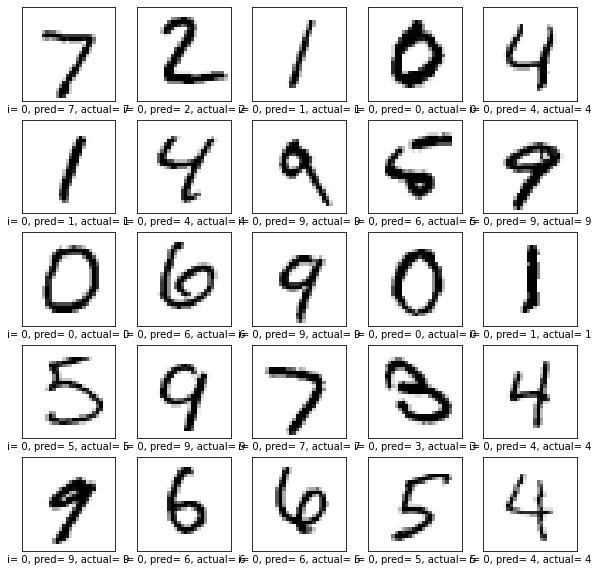

In [51]:
plt.figure(figsize=(10,10))
start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = y_test[start_index + i]
    plt.xlabel("i= {}, pred= {}, actual= {}".format(start_index, pred, actual))
    plt.imshow(x_test[start_index + i], cmap= "binary")
plt.show()

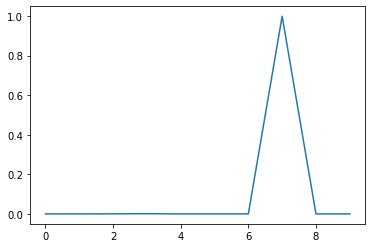

In [54]:
plt.plot(preds[0])
plt.show()